In [0]:
# neccessary imports
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow as cv_imshow
# version check
cv.__version__

'3.4.3'

In [0]:
## Creating a function to download img from a url specified by the USER
import urllib.request as urlrequest

def dl_img(url, file_path, file_name):
  _path = file_path + file_name + '.jpg'
  urlrequest.urlretrieve(url, _path)
  
url = input("URL: ")
saveas = input("File Name: ")

dl_img(url, '/content/', saveas)

# https://cdn.shopify.com/s/files/1/1893/0477/products/5PCS_Framed_Colorful_Lion_Canvas_Prints_grande.png?v=1504331897
# https://www.artgalleryofhamilton.com/wp-content/uploads/2018/04/abstract-painting.jpg
# https://matplotlib.org/3.1.1/_images/sphx_glr_scatter_piecharts_thumb.png
# https://matplotlib.org/3.1.1/_images/sphx_glr_scatter_001.png
# https://matplotlib.org/3.1.1/_images/sphx_glr_scatter3d_001.png
# https://www.mathworks.com/help/examples/matlabmobile/win64/Scatter3DPlotExample_01.png

URL: https://www.artgalleryofhamilton.com/wp-content/uploads/2018/04/abstract-painting.jpg
File Name: abstract_paint


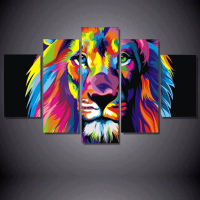

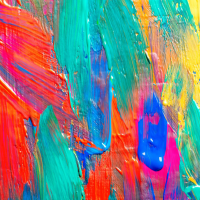

In [0]:
# load an img
# img1 = cv.imread('3D_scatterplot.jpg', 1)
# img2 = cv.imread('blob_scatterplot.jpg', 1)
img1 = cv.imread('abstract_lion.jpg', 1)
img2 = cv.imread('abstract_paint.jpg', 1)

# resizing imgs. to same size & display the img.
imgr1 = cv.resize(img1, (200, 200), interpolation = cv.INTER_AREA)
imgr2 = cv.resize(img2, (200,200), interpolation = cv.INTER_AREA)

cv_imshow(imgr1)
cv_imshow(imgr2)


* ADDING two Images 
>  +(add operator):   Retains their OPAQUENESS

  > cv.add(): adds each of the pixel values e.g: (155,211,79) + (50,170,200) = (205,381,279) ---> (205,255,255) 
  
  > cv.addWeighted(img1, img1_weight, img2, img2_weight, gamma)
     *  gamma {float} = measurement of light (0: no light added) 

img1= (200, 200, 3) img2= (200, 200, 3)
+img = (200, 200, 3)


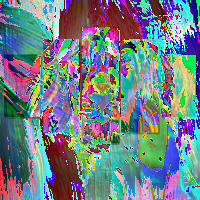

In [0]:
print("img1=",imgr1.shape,"img2=",imgr2.shape)

# Adding two imgs. using +                          
add_using_plus = imgr1 + imgr2

print("+img =",add_using_plus.shape)
cv_imshow(add_using_plus)

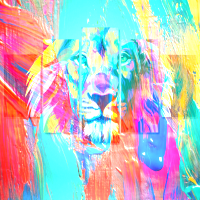

In [0]:
# Adding two imgs. using cv.add()
add_using_func = cv.add(imgr1, imgr2)

cv_imshow(add_using_func)

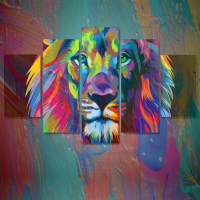

In [31]:
# Adding two imgs. using cv.addWeighted()
add_using_weights = cv.addWeighted(imgr1, 0.7, imgr2, 0.3, 0)

cv_imshow(add_using_weights)